# EDA - Mcdonalds Case Study

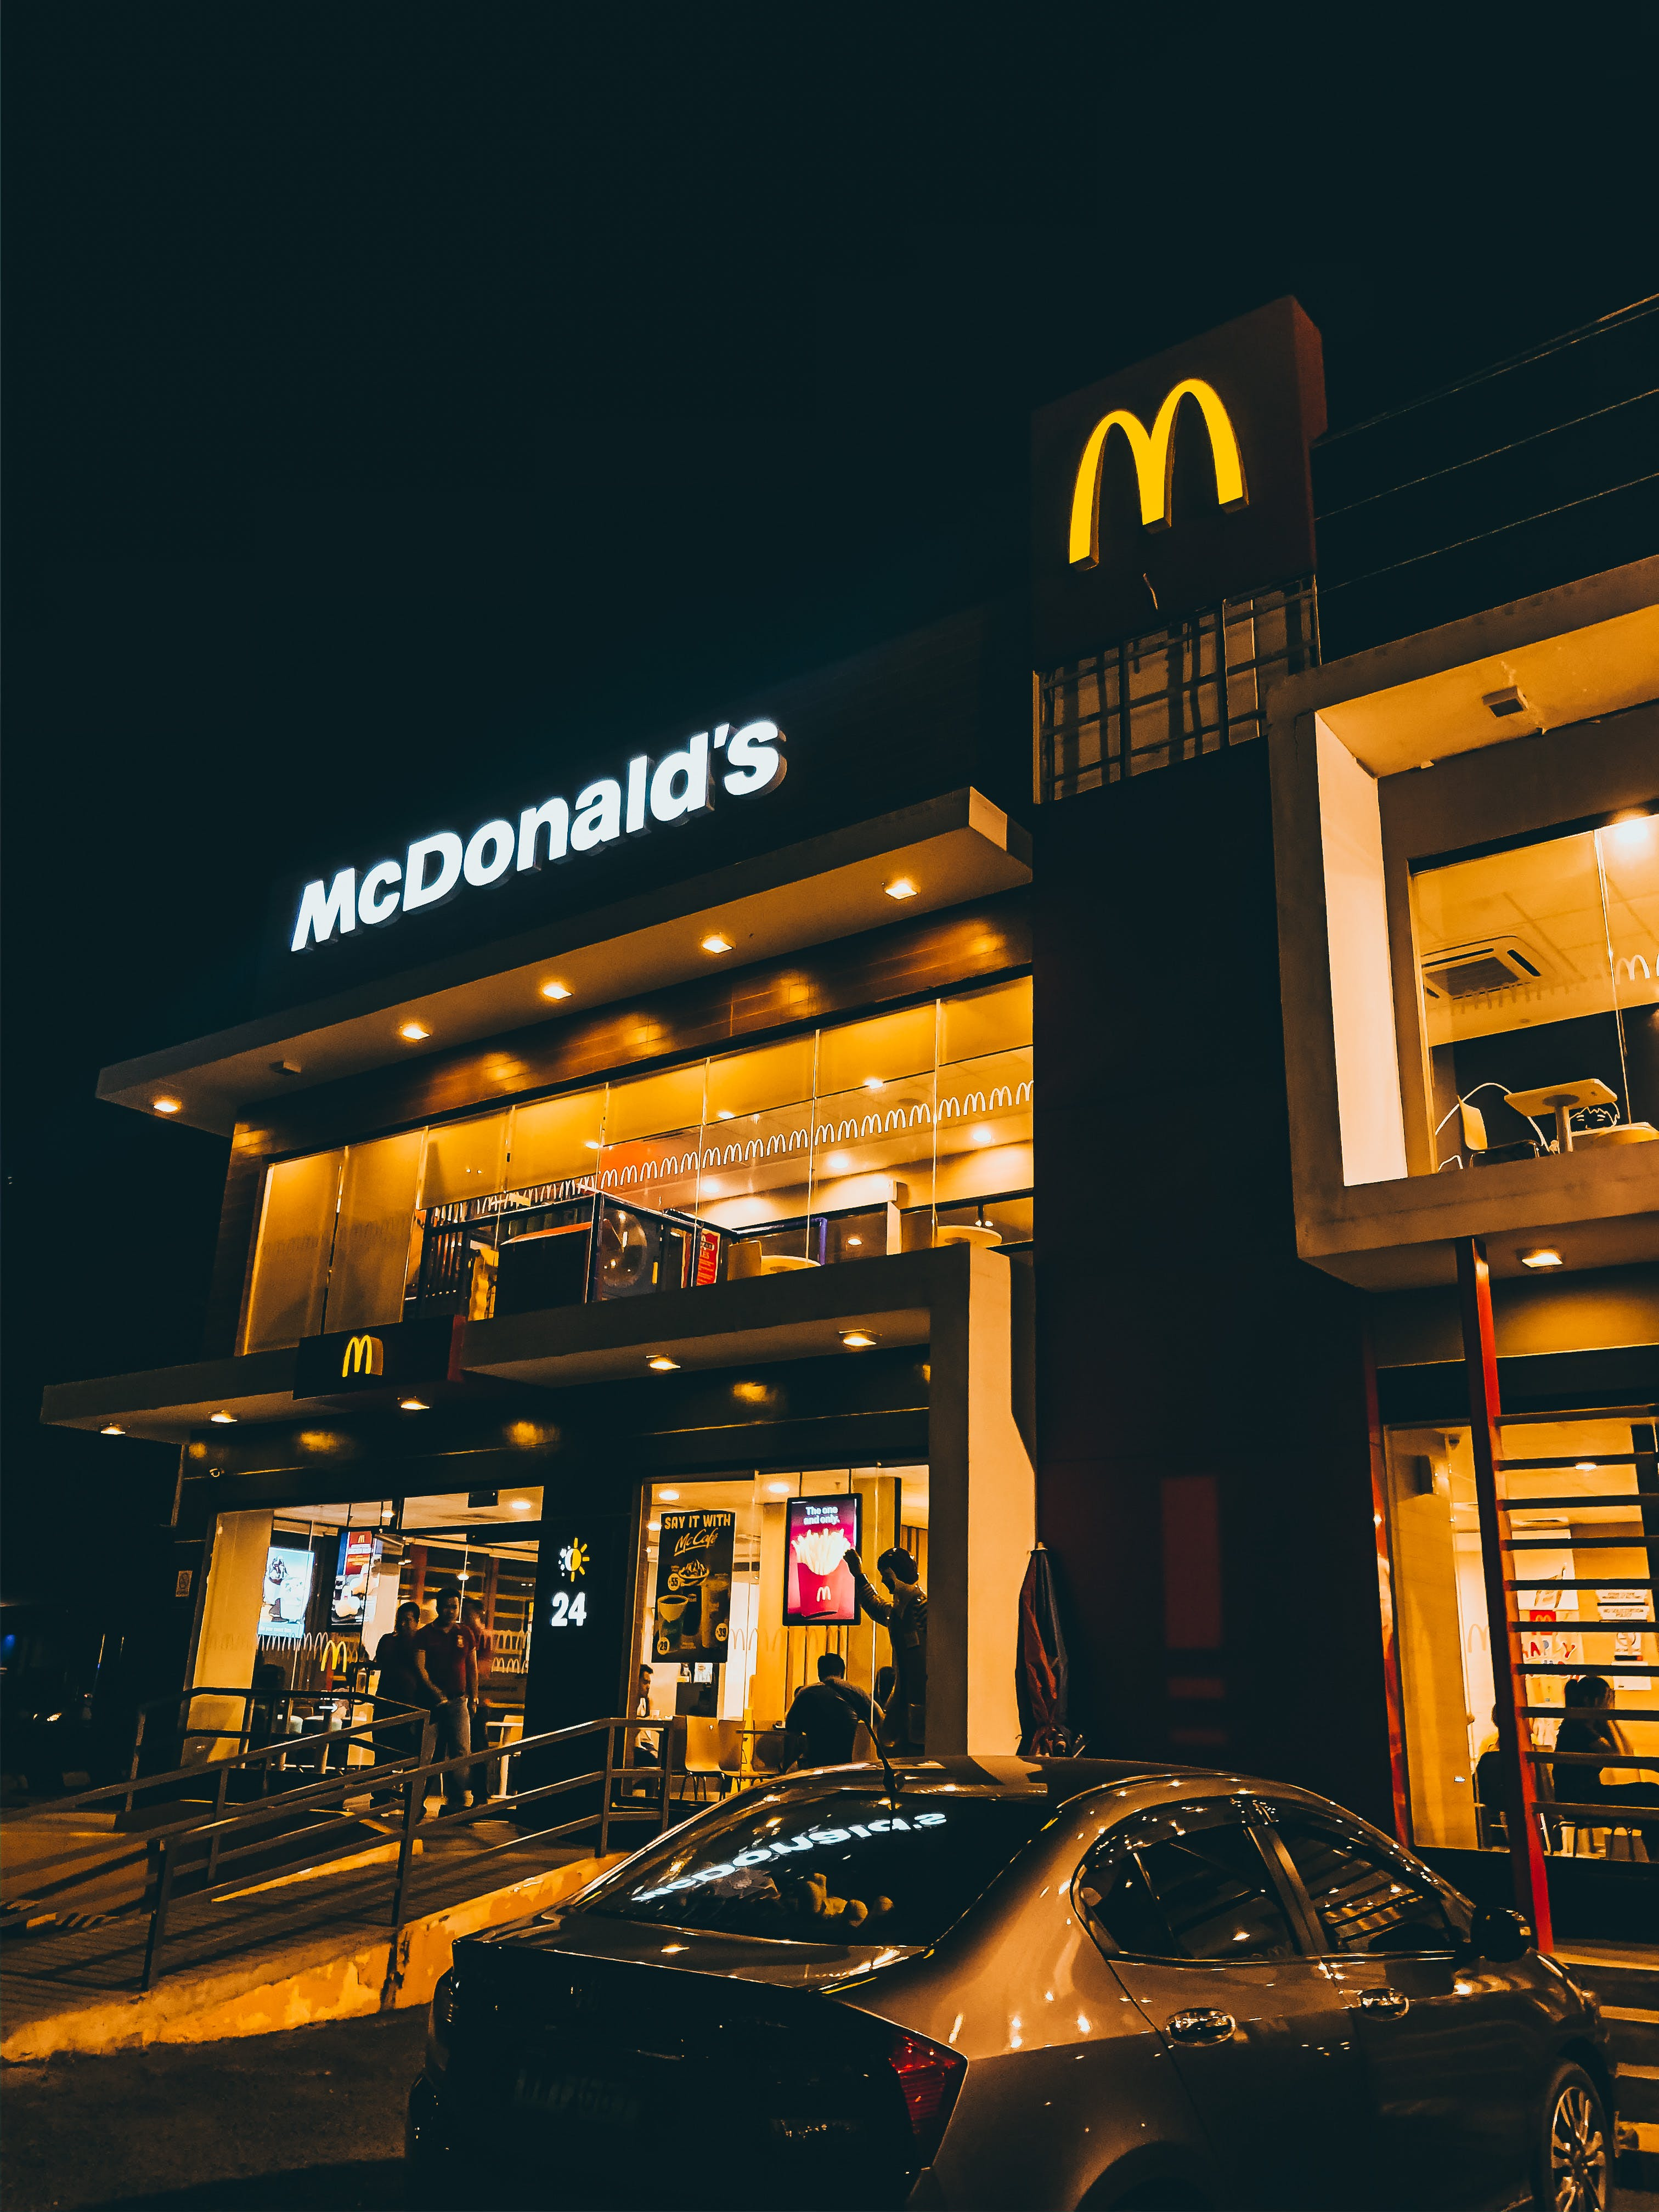

This case study serves as a practical example of market segmentation analysis using a unique dataset initially collected for survey research on brand image. Imagine being in McDonald's shoes—our aim is to explore whether distinct consumer segments with different perceptions of McDonald's exist. By understanding systematic differences in brand perceptions across segments, we can strategically focus on particular markets and tailor our messages accordingly. The goal is to identify and strengthen positive perceptions within segments or understand and modify negative perceptions by deciphering the key drivers. This exploration guides McDonald's in refining its marketing approach for diverse consumer groups

## Step 1: Deciding not to Segment

1. McDonald's may choose to position itself as a brand catering to the entire market, implying that they view their offerings as universally appealing. In this approach, the focus is on providing a consistent experience without delving into systematic differences across various consumer segments.
2. Alternatively, McDonald's may recognize the value in understanding systematic differences among consumers. Despite being a market giant, acknowledging and leveraging these differences allows for a more tailored and effective marketing strategy. This approach involves recognizing diverse consumer preferences and crafting targeted initiatives to better meet the varied needs within the market.
3. By opting for a differentiated marketing strategy, McDonald's acknowledges the potential benefits of investigating and capitalizing on systematic heterogeneity among consumers. This involves tailoring marketing efforts to specific segments, recognizing that a one-size-fits-all approach may not fully exploit the diverse preferences and behaviors present in the market.

## Step 2: Specifying the Ideal Target Segment

1. **Target Segment Criteria**: McDonald's aims for segments that are similar within, distinct from others, sizable for customized marketing, align with McDonald's strengths, identifiable, and reachable through communication channels.
2. **Segment Attractive Focus**: McDonald's targets segments with positive perceptions, frequent dining habits, and a liking for fast food. Exploring segments with negative perceptions is also considered, emphasizing understanding and potential modification. The dataset uses liking McDonald's and frequent dining as key attractiveness criteria.

## Step 3: Collecting Data

* **Data Overview:**
The dataset includes responses from 1453 adult Australian consumers, capturing their perceptions of McDonald's across attributes like YUMMY, CONVENIENT, SPICY, and more. These attributes emerged from a qualitative study conducted before the survey.
* **Attributes and Responses:**
For each attribute, respondents indicated whether McDonald's possesses it (YES) or not (NO). The attributes cover a spectrum from taste-related factors like YUMMY and TASTY to health considerations like HEALTHY.
* **Demographic Information:**
Respondents also provided details on their AGE and GENDER, enriching the dataset with demographic insights. However, for a comprehensive market segmentation study, additional information like dining behavior and information channel usage would be collected for a more detailed market segment description.

## Step 4: Exploring Data

In [97]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [98]:
df = pd.read_csv('/content/mcdonalds.csv')

Feature informations

In [99]:
print('Features in our dataset')
df.columns

Features in our dataset


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [100]:
# Total records
print('There are total {} records and {} features in Mcdonald dataset'.format(df.shape[0],df.shape[1]))

There are total 1453 records and 15 features in Mcdonald dataset


#### Dataset overview

In [101]:
# Top 3 records
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [102]:
# Total numeric and categorial featurs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


* *Inference*
Except one feature which is 'Age' every feature is of object datatype.<br>
* *conclusion*-
We are required to convert this object datatype into numeric datatype in order to apply machine learning models

In [103]:
# Preparing dataset specific for selective input features
yes_no_features_df = df.iloc[:,0:11]

In [104]:
yes_no_df = yes_no_features_df.applymap(lambda x : 1 if x == 'Yes' else 0)
yes_no_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [105]:
binary_encoded_featurs = yes_no_df.columns
for column in binary_encoded_featurs:
  print('{}% People voted {} in their meal'.format(np.round(np.average(yes_no_df[column])*100,2),column))

55.26% People voted yummy in their meal
90.78% People voted convenient in their meal
9.36% People voted spicy in their meal
86.72% People voted fattening in their meal
52.65% People voted greasy in their meal
90.02% People voted fast in their meal
59.88% People voted cheap in their meal
64.42% People voted tasty in their meal
35.79% People voted expensive in their meal
19.89% People voted healthy in their meal
24.29% People voted disgusting in their meal


* *Inferences*
1. 91% of total meal eaters says the meal was convenient to them
2. And only 9% people finds the meal *spicy*

* *Further step*
1. There is another way to explore the data which is Principal compnents analysis
2. PCA is not only used to reduce the dimensions , also referred to as factor-cluster analysis

In [106]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca.fit(yes_no_df)

PCA(n_components=11)

In [107]:
print('Principal components variance')
pca.explained_variance_

Principal components variance


array([0.57312398, 0.36900226, 0.2546408 , 0.15904032, 0.11384214,
       0.09627033, 0.08392454, 0.07569209, 0.07035814, 0.06192225,
       0.05612296])

In [108]:
print('Principal component standard deviattion')
np.sqrt(pca.explained_variance_)

Principal component standard deviattion


array([0.75704952, 0.60745556, 0.50461946, 0.39879859, 0.33740501,
       0.31027461, 0.28969732, 0.27512196, 0.2652511 , 0.24884182,
       0.23690284])


* Here, first two PC's cover more than 90% of the information

In [109]:
pca.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

<Axes: >

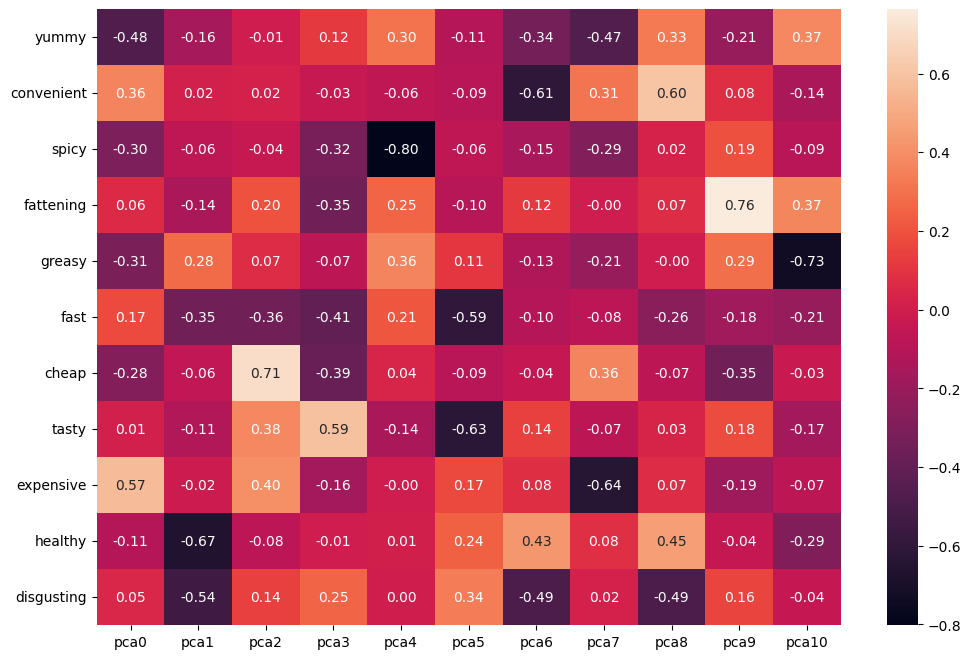

In [110]:
# Heatmap representation of factor loadings
plt.figure(figsize=(12,8))
sns.heatmap(pca.components_, annot=True, fmt='0.2f',yticklabels=pca.feature_names_in_
            ,xticklabels= pca.get_feature_names_out())

* *Inferences*
1. Spicy and greasy shows highly negative relation with PCs

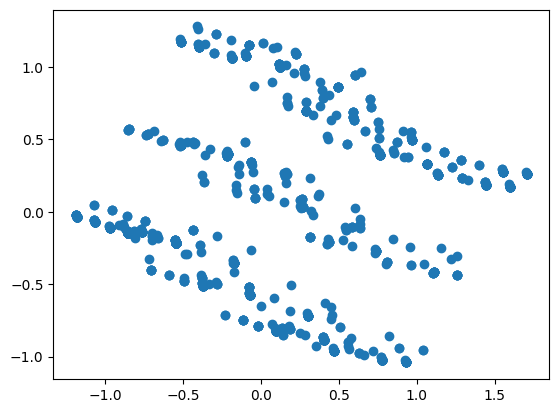

In [111]:
# Plotting and visualizing PC1 and PC2
pc_components = pca.transform(yes_no_df)
# plt.figure(figsize = (12,10))
plt.scatter(pc_components[:,0], pc_components[:,1])

## Step 5: Extracting segments
In this section, we will see the range of extraction techniques-
1. *K-means*
2. *binary distribution*
3. *Finite mixture of regression*

### 1. k-means
* To determine the optimal number of segments, we initiate the K-Means algorithm. Lacking prior knowledge of the ideal segment count, we explore solutions ranging from two to eight segments
* Our assessment involves comparing each segmentation outcome using the metric of "inertia." **Inertia**, representing the sum of distances of each point in a cluster from the centroid, serves as a crucial measure to gauge the effectiveness of different segmentations.
* We systematically calculate and evaluate solutions for various segment counts, aiming to identify the number of segments that minimizes inertia. This iterative process enables us to uncover the most fitting segmentation that accurately captures the underlying structure of the data

In [112]:
# kMeans algorithm with various k values

# Store inertia values of all k segments into inertia list
inertia = []

for i in range(1,9):
  k = KMeans(n_clusters=i)
  k.fit(yes_no_df)
  inertia.append(k.inertia_)

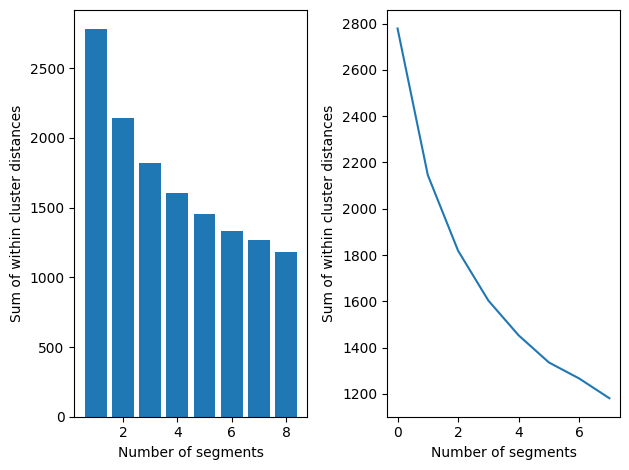

In [113]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(x = list(range(1,9)),height = inertia )

ax1.set_ylabel('Sum of within cluster distances')
ax1.set_xlabel('Number of segments')

# line plot
ax2.plot(inertia)
ax2.set_ylabel('Sum of within cluster distances')
ax2.set_xlabel('Number of segments')

plt.tight_layout()

* *Inferences*
1. Values are decreasing as there is increment in segments
2. Because more market segments automatically mean that the segments are smaller and, as a consequence, that segment members are more similar to one another.

In [114]:

# here we have taken 100 bootstrap samples (nboot)
# 10 random initializations for each sample

def bootFlexclust(data, num_segments_range, nrep=10, nboot=100, random_seed=1234):
    np.random.seed(random_seed)
    stability_scores = []

    for k in num_segments_range:
        k_stabilities = []

        for rep in range(nrep):
            cluster_assignments = []

            for boot_sample in range(nboot):
                # Bootstrap sampling
                boot_data = resample(data)

                # K-means clustering
                kmeans = KMeans(n_clusters=k, n_init=1)  # Using n_init=1 for reproducibility
                labels = kmeans.fit_predict(boot_data)
                cluster_assignments.append(labels)

            # Calculate adjusted Rand index for each pair of bootstrap samples
            pairwise_scores = np.zeros((nboot, nboot))
            for i in range(nboot):
                for j in range(i + 1, nboot):
                    pairwise_scores[i, j] = pairwise_scores[j, i] = adjusted_rand_score(cluster_assignments[i], cluster_assignments[j])

            # Average adjusted Rand index over all pairs of bootstrap samples
            average_score = np.mean(pairwise_scores)
            k_stabilities.append(average_score)

        stability_scores.append(k_stabilities)

    return np.array(stability_scores)


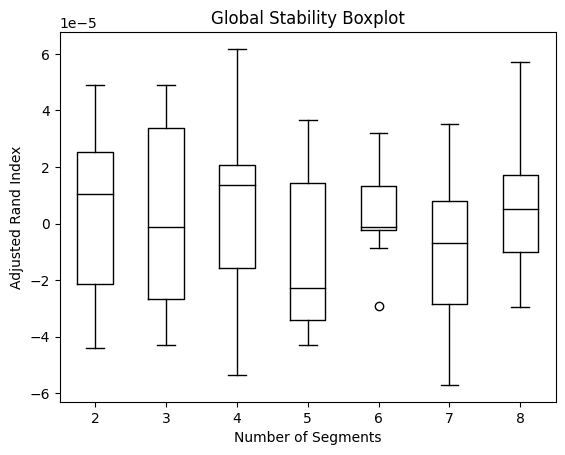

In [115]:
MD_b28 = bootFlexclust(yes_no_df, range(2, 9), nrep=10, nboot=100)

# Plot the global stability boxplot
plt.boxplot(MD_b28.T, labels=range(2, 9), medianprops=dict(color='black'))
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.show();

* *Conclusion*-
1. From barchart and line plot (which also known as elbow method), It clears that after 4 segments size of the clusters are being reduced rapidly
2. Going with total 4 clusters will give the best result by analysign the above two charts (elbow method & boxplot)


### 2. Using Mixtures of Distributions

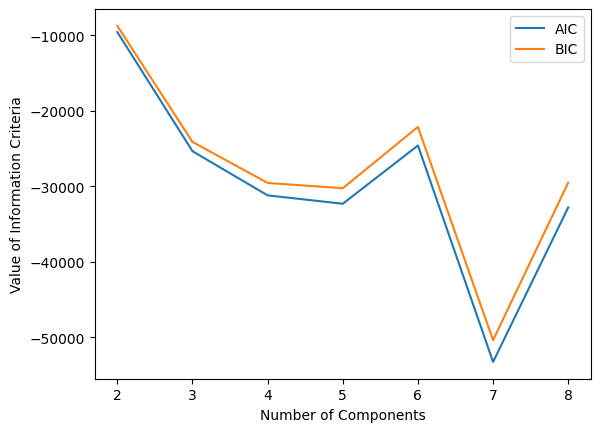

In [116]:

data = yes_no_df

# Assuming all columns in your dataset are binary
# If not, you may need to select the columns containing binary data
binary_columns = data.columns

# Create a binary Gaussian Mixture Model
def binary_mixture_model(data, components_range):
    models = [GaussianMixture(n_components=k, covariance_type='full') for k in components_range]
    models = [model.fit(data) for model in models]
    return models

# Choose the number of components (segments) to evaluate
components_range = range(2, 9)

# Fit the models
models = binary_mixture_model(data[binary_columns], components_range)

# Plotting the information criteria
aic_values = [model.aic(data[binary_columns]) for model in models]
bic_values = [model.bic(data[binary_columns]) for model in models]

plt.plot(components_range, aic_values, label='AIC')
plt.plot(components_range, bic_values, label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.show()

# Choose the number of components based on the visual inspection of the plot
selected_components = 4

# Extract the cluster assignments for each data point
cluster_assignments = models[selected_components].predict(data[binary_columns])

# Display the cross-tabulation
cross_tab = pd.crosstab(index=cluster_assignments, columns="count")



In [117]:
# This method aims to confirm that 4 segments are the optimal choice for this dataset.

# Utilizing Gaussian Mixture, it's beneficial to have continuous (non-binary) values.
# To achieve this, we apply PCA first.

# Applying PCA to convert data into two dimensions
pca = PCA(n_components=2)
gaussian_data = pca.fit_transform(yes_no_df)

# Creating a DataFrame with the transformed data
gaussian_data = pd.DataFrame(gaussian_data, columns=['X1', 'X2'])

# Creating a copy of the Gaussian data for further processing
gaussian_data_copy = gaussian_data.copy()

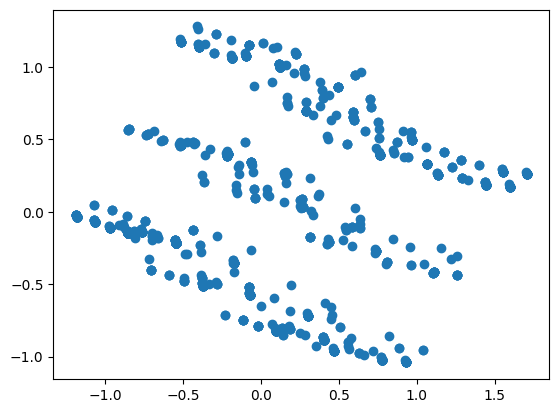

In [118]:
plt.scatter(guassian_data['X1'],guassian_data['X2'])

In [119]:
gmm = GaussianMixture(n_components=4)

gmm.fit(guassian_data)

labels = gmm.predict(guassian_data)

In [120]:
guassian_data['segments'] = labels

# partitioning
d0 = guassian_data[guassian_data['segments'] == 0]
d1 = guassian_data[guassian_data['segments'] == 1]
d2 = guassian_data[guassian_data['segments'] == 2]
d3 = guassian_data[guassian_data['segments'] == 3]

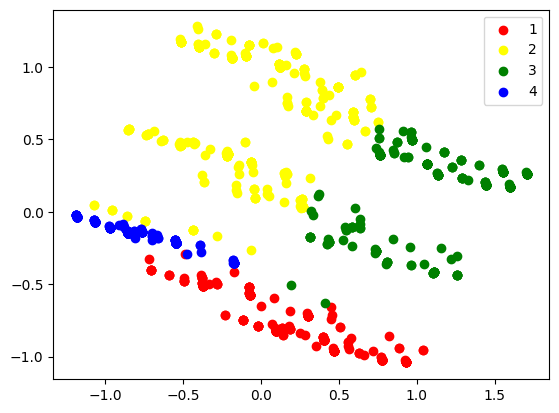

In [121]:
# plotting all the segments
plt.figure()
plt.scatter(d0['X1'],d0['X2'],c = 'r')
plt.scatter(d1['X1'],d1['X2'],c = 'yellow')
plt.scatter(d2['X1'],d2['X2'],c = 'g')
plt.scatter(d3['X1'],d3['X2'],c = 'blue')
plt.legend(['1','2','3','4'])

* **Interpretations-**
1. It can clearly observed blue and red segments are devided by a line with slope ~ (1/root2) , with intercept ~ -1.5
2. For green segment the divider would be negatively sloped with intercept ~ 0.0

In [122]:
print('Convergged log-likelihood value {}'.format(gmm.lower_bound_))
print('Number of iterations {}'.format(gmm.n_iter_))

Convergged log-likelihood value 5.2999755370570565
Number of iterations 4


In [123]:
# Function to return AIC and BIC values
def aic_bic_values(model,components,data):
  AIC_values = []
  BIC_values = []
  for i in range(2,components+1):
    gmm = model(n_components = i)
    gmm.fit(data)
    gmm.aic(data)
    AIC_values.append(gmm.aic(data))
    BIC_values.append(gmm.bic(data))

  return AIC_values, BIC_values


In [124]:
# Function implementation
AIC, BIC  =aic_bic_values(GaussianMixture,8,guassian_data_copy)

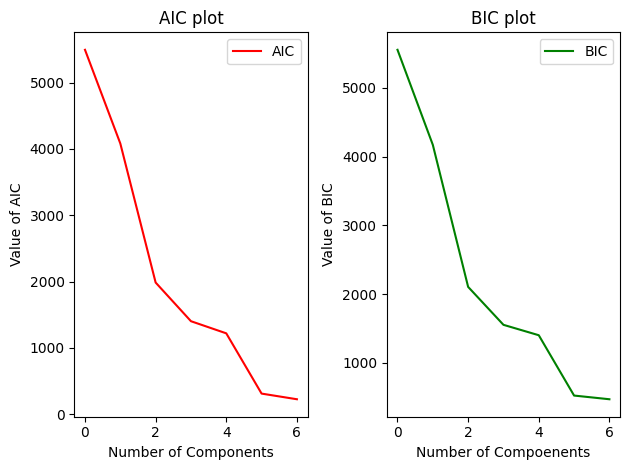

In [125]:
fig = plt.figure()
ax1 =fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(AIC,c = 'r',label = 'AIC')
ax2.plot(BIC, c = 'g', label = 'BIC')
ax1.legend()
ax2.legend()

ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Value of AIC')
ax1.set_title('AIC plot')


ax2.set_xlabel('Number of Compoenents')
ax2.set_ylabel('Value of BIC')
ax2.set_title('BIC plot')

# tight layout
plt.tight_layout()

* *Inference*
1. Minimal disparity is observed in the AIC and BIC values.

### 3. Using mixtures of regression models

1. In Mixtures of Linear Regression (MLR) model, each observation is generated from one of the several unknown linear regression components, where the identify of the generated components is also unknown.
2. We will be using statsmodels which is a Python modelue that provides classes and functions for the estimation of many different statistical models

In [126]:
import statsmodels.api as sm
# analysing our dataset
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

* First, It is required to convert these values into the numerice ones,
* We can do this by subtracting the values of the feature by 6
* Since we also have some 'Object' datatype values like I hate it! which represents -5 and I love it! which represents +5 ,
* So first task is to convert these string objects into numeric one +5 and -5 respectively

In [127]:
# make copy of original dataframe
df_new = df.copy()

In [128]:
# Function to convert string into numeric values
def string_to_numeric_conversion(value):
  if value == 'I hate it!-5':
    return -5
  elif value == 'I love it!+5':
    return 5
  else:
    if '-' in value:
      value = int(value.split('-')[1])
      return -value
    else:
      return int(value)

In [129]:
yes_no_df['Like'] = df_new['Like'].apply(string_to_numeric_conversion)

In [130]:
# Copy of original dataset
mix_regression_df = yes_no_df.copy()

In [131]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
mix_regression_df['Segment'] = gmm.fit_predict(mix_regression_df.drop('Like',axis=1))

# Iterate over segments and fit Linear regression model
segments = mix_regression_df['Segment'].unique()
models = {}

for segment in segments:
  segment_data = mix_regression_df[mix_regression_df['Segment']==segment]
  y = segment_data['Like']
  X = segment_data[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
  X = sm.add_constant(X)
  model = sm.OLS(y,X).fit()
  models[segment] = model



In [132]:
# Print summaries for each segment
for segment, model in models.items():
  print('\nSegment {}:\n{}'.format(segment,model.summary()))


Segment 2:
                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     4.322
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           3.03e-05
Time:                        17:42:07   Log-Likelihood:                -581.20
No. Observations:                 261   AIC:                             1182.
Df Residuals:                     251   BIC:                             1218.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2937      0.703     -3.

Bar plot representation

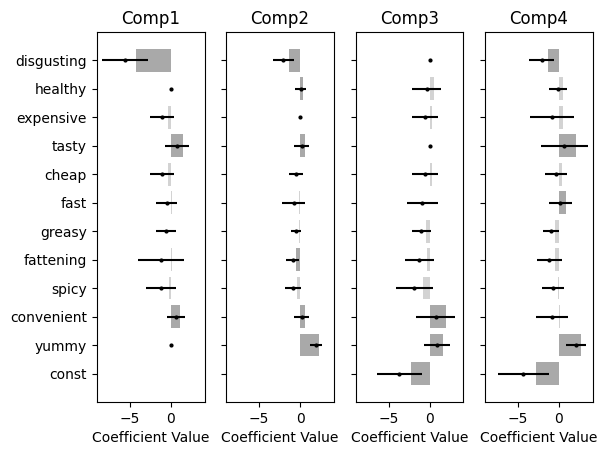

In [133]:
fig , axes = plt.subplots(1,4, sharex = True, sharey= True)
for segment, model in models.items():
  coefficients = model.params
  p_values = model.pvalues

  # Create a color map based on p-values
  colors = np.where(p_values < 0.05, 'darkgrey','lightgrey')

  # Plot the coefficients
  axes[segment].barh(coefficients.index, coefficients, color = colors)


  # plot 95% confidence intervals
  conf_int = model.conf_int(alpha=0.05)
  axes[segment].errorbar(conf_int[0], coefficients.index, xerr=conf_int[1]-conf_int[0], fmt='o',color = 'black',markersize=2)

  # set subplots titles
  axes[segment].set_title('Comp{}'.format(segment+1))

  axes[segment].set_xlabel('Coefficient Value')
# plt.title('Regression Coefficients with Significance Shading and Confidence Intervals')
plt.show()

* *Infrences*
1. The bar plot doesn't offer extensive insights, but the primary factors driving segmentation are discernible. Notably, features such as expensive, tasty, cheap, fast, greasy, fattening, spicy, and convenient play a pivotal role in the segmentation process.
2. A comparison with Component 1 highlights that individuals associated with this component appear to be less concerned about their health. This inference is drawn from the higher coefficients assigned to cheap and fast criteria, suggesting a tendency towards prioritizing affordability and speed over health considerations.

## Step 6: Profiling Segments

1. Objective: Understand the meaning of the four-segment k-means solution in segmentation analysis.

2. Key Step: Create a segment profile plot to visualize key characteristics of each market segment and highlight differences between them.

3. Enhancing Interpretability: To ensure the plot is easy to interpret, similar attributes should be positioned close to one another.

4. Hierarchical Cluster Analysis: To achieve the positioning of similar attributes, a hierarchical cluster analysis is performed on attributes (rather than consumers).

5. Hierarchy Identification: The hierarchical cluster analysis identifies, attribute by attribute, the most similar ones, grouping them together.

6. Segmentation Completion: The core of the segmentation analysis is considered complete after extracting market segments, and the focus shifts to understanding the meaning of these segments through visual representation and attribute analysis.

In [134]:
# Create a dictionary for storing percentages and values
percentages = {}

# Iterate over segments
for segment in sorted(mix_regression_df['Segment'].unique()):
    segment_data = mix_regression_df[mix_regression_df['Segment'] == segment]

    # Initialize an empty dictionary for each segment
    segment_percentages = {}

    # Calculate the percentage of total data for each feature
    total_percentage = len(segment_data) / len(mix_regression_df) * 100
    segment_percentages['total'] = total_percentage

    # Calculate the percentage of '1' values for each feature
    for feature in mix_regression_df.columns[:-2]:
        feature_percentage = len(segment_data[segment_data[feature]==1]) / len(segment_data) * 100
        segment_percentages[feature] = feature_percentage

    # Add the segment percentages to the main dictionary
    percentages[segment] = segment_percentages


Four-Segment Profile Plot: Fast Food Dataset"

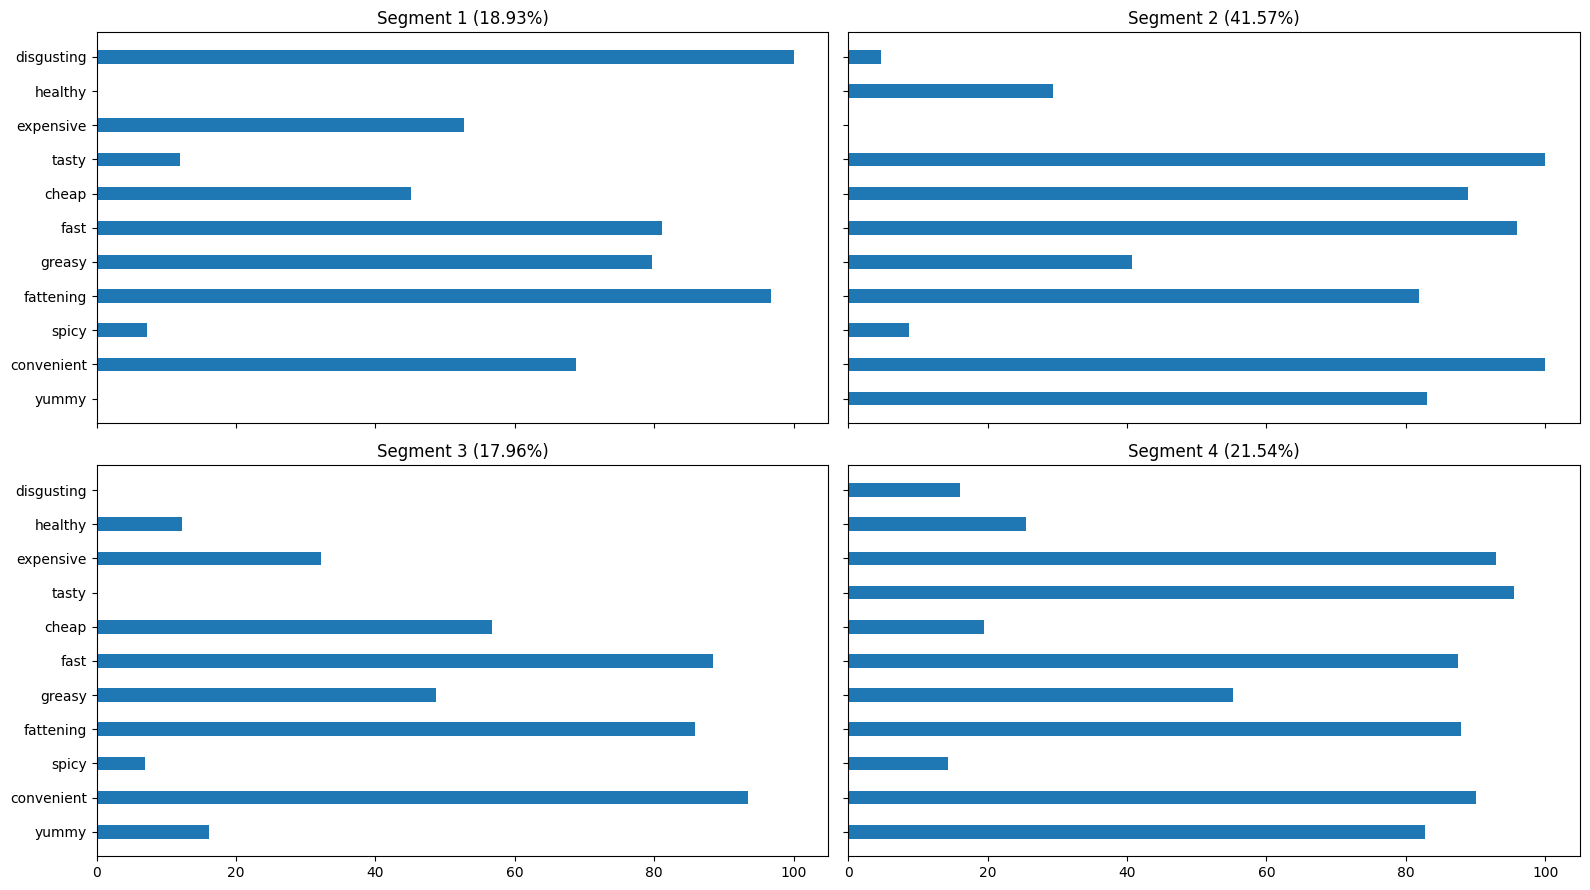

In [135]:
# Plotting on graph

segments = percentages.keys()
fig , axes = plt.subplots(2,2, sharex = True, sharey= True, figsize=(16,9))
axes = axes.ravel()
for i in range(4):
  total = list(percentages[i].values())[0]
  x = list(percentages[i].values())[1:]
  y = list(percentages[i].keys())[1:]
  axes[i].barh(y,x,height = 0.4)
  axes[i].set_title('Segment {} ({}%)'.format(i+1,np.round(total,2)))

plt.tight_layout()

* *Inferences*
1. Notably, Segment 3 stands out by encompassing 38% of the total dataset. This suggests a significant representation within the dataset, indicating its prevalence among consumers.
2. segment 1 's consumers are more conscious about health
3. Segment 4 is exactly opposite to segment 1 in terms of healthy feature
4. Segment 3 consumers are not at all concered about how costly the food in MacD

## Step 7 :Describing Segments-


1. In the realm of market segmentation analysis, understanding consumer sentiments is pivotal. Our journey with the fast-food dataset takes an interesting turn as we delve into the association between segment membership and the love-hate relationship with McDonald's.

2. Our dataset, though unconventional for segmentation analysis, offers a glimpse into consumer preferences. Descriptor variables, which enrich our understanding, are scant. However, a crucial variable emerges - the extent to which consumers adore or detest McDonald's.

2. To unravel the intricate connection between segment membership and the love-hate variable, we turn to a mosaic plot. This visual masterpiece provides a snapshot of the relationships within our data.


3. Let's embark on the journey of creating our shaded mosaic plot. We begin by extracting segment memberships for each consumer in our four-segment solution. Cross-tabulating this with the love-hate variable sets the stage. The mosaic plot, adorned with shaded cells, unveils deviations from the expected frequencies.

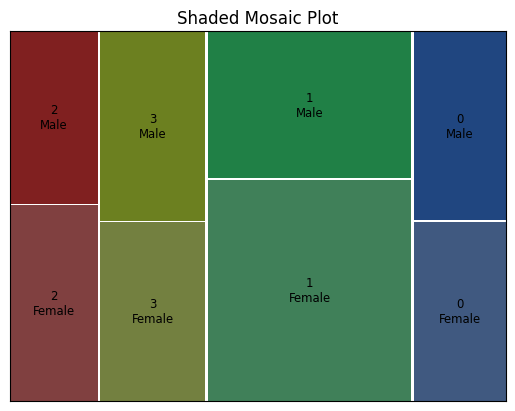

In [136]:

# Preparing dataset
mosaic_df = mix_regression_df.copy()
mosaic_df['Gender'] = df['Gender']
# Assume k4 as our segment membership and mcdonalds as our DataFrame
data = mosaic_df
mosaic(data, ['Segment','Gender'], title='Shaded Mosaic Plot', axes_label=False)
plt.show()

* *Inferences*-
1. A notable observation is the relatively low segment density within Segment 0. This implies a smaller representation or lower occurrence of individuals within this particular segment compared to others.
2. Across almost every segment, there is a consistent proportion of both male and female individuals. The gender distribution remains fairly balanced, indicating that gender may not be a distinguishing factor among the identified segments.

Age segmentation with Boxen plot

Text(0.5, 1.0, 'Whister plot of age by segment for the fast food at MacD')

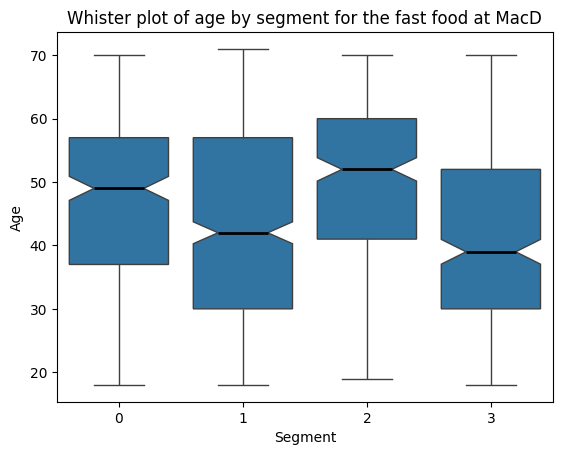

In [137]:
# Preparing dataset
boxen_df = mix_regression_df.copy()

# add age column
boxen_df['Age'] = df['Age']
sns.boxplot(
    data = boxen_df,
    x = 'Segment',
    y = 'Age',
   notch = True,
    medianprops={"color": "black", "linewidth": 2}
)
plt.title('Whister plot of age by segment for the fast food at MacD')

* *Inferences-*
1. Notably, Segment 2 stands out as the only segment comprising individuals with a median age exceeding 50. This demographic insight provides a unique identifier for this particular segment.

2. Limitation of Descriptor Variables:
However, the inference drawn also underscores a limitation in the segmentation approach—the absence of a more extensive set of descriptor variables. The current set of variables may not sufficiently capture the nuanced characteristics that could differentiate between segments more effectively.
3. The observation highlights the potential benefit of incorporating additional descriptor variables. Expanding the set of features can contribute to the development of a more detailed and comprehensive description for each market segment.

* We could have more descriptor variabels for this segmentation problem
* Having more descriptors can help in developing a detailed description of each market segment.

## Step 8: Selecting Target Segment

With the groundwork laid in the preceding seven steps, the market segmentation process has culminated in the creation of distinct consumer segments for McDonald's. In this crucial phase, we move beyond segmentation construction to evaluate and prioritize these segments based on specified criteria
1. Building upon the detailed segmentation analysis, mean values of pertinent variables are computed for each identified market segment.
2. Certain variables undergo necessary transformations, ensuring compatibility for subsequent analysis. For instance, 'VisitFrequency' is needed to convert into a numeric format, and gender information is standardized to numeric values.
3. Identified market segments are categorized as either attractive or less attractive based on predetermined criteria. Recommendations include retention strategies for attractive segments and potential reevaluation for less attractive ones.
4. The segment evaluation plot serves as a powerful decision support tool, providing McDonald's managers with actionable insights. It aids in prioritizing segments for targeted marketing efforts, resource allocation, and customer satisfaction initiatives.

## Step 9: Customising the Marketing Mix

1. To address the price sensitivity of young customers in Segment 3, McDonald's could consider launching a new product line named MCSUPERBUDGET. This line would offer affordable options specifically designed to meet the price expectations of this segment.
2. To prevent overlap with the main product range, features of MCSUPERBUDGET items would be distinct. This ensures that customers perceive it as a unique and budget-friendly offering.
3. Identify and utilize communication channels preferred by members of Segment 3 to promote the MCSUPERBUDGET line effectively. This could involve social media platforms, mobile apps, or other channels that resonate with young customers.
4. Identify and utilize communication channels preferred by members of Segment 3 to promote the MCSUPERBUDGET line effectively. This could involve social media platforms, mobile apps, or other channels that resonate with young customers.

## Step 10: Evaluation of segmenting using decision tree

* *Further moves*-
1. We now possess a dataset containing target features (segments) obtained through the application of unsupervised machine learning techniques.

2. For the purpose of evaluation, we will employ a supervised machine learning technique, specifically the decision tree algorithm.

* *Motive to use decision tree:*
1. The unsupervised machine learning technique provides segmentation, but we lack certainty about the precise weightage assigned to dependent features in the process.

2. Utilizing the decision tree algorithm allows us to gain a comprehensive understanding of the segmentation process, providing a clearer picture of the impact of different features.

* *What next-*
3. Subsequently, we will assess the accuracy of the model on a test dataset, aiming to ascertain the actual effectiveness of the model in predicting segment memberships.

* **Note** - It's crucial to note that only the same features used by the Mixture Regression model in the unsupervised technique will be employed. This implies the exclusion of certain features such as frequency, age, and gender from the model.

In [138]:
decision_df = mix_regression_df.copy()

In [139]:
# split into train and test dataset
X =decision_df.iloc[:,:-1]
y = decision_df[['Segment']]
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state = 42)

# Fitting the model
clf = DecisionTreeClassifier()
clf.fit(X,y)

# Prediction
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [140]:
print('Accuray on training dataset {}'.format(accuracy_score(y_train,y_pred_train)))
print('Accuray on test dataset {}'.format(accuracy_score(y_test,y_pred_test)))

Accuray on training dataset 1.0
Accuray on test dataset 1.0


* *Conclusion*
1. Upon examination, it is evident that the model is prone to overfitting. This is primarily attributed to a scarcity of information, both in terms of the number of records and the variety of features.<br>

2. The limited dataset compelled the model to fit forcefully without adequately generalizing.

Decision tree interpreted by Decision tree algorithm

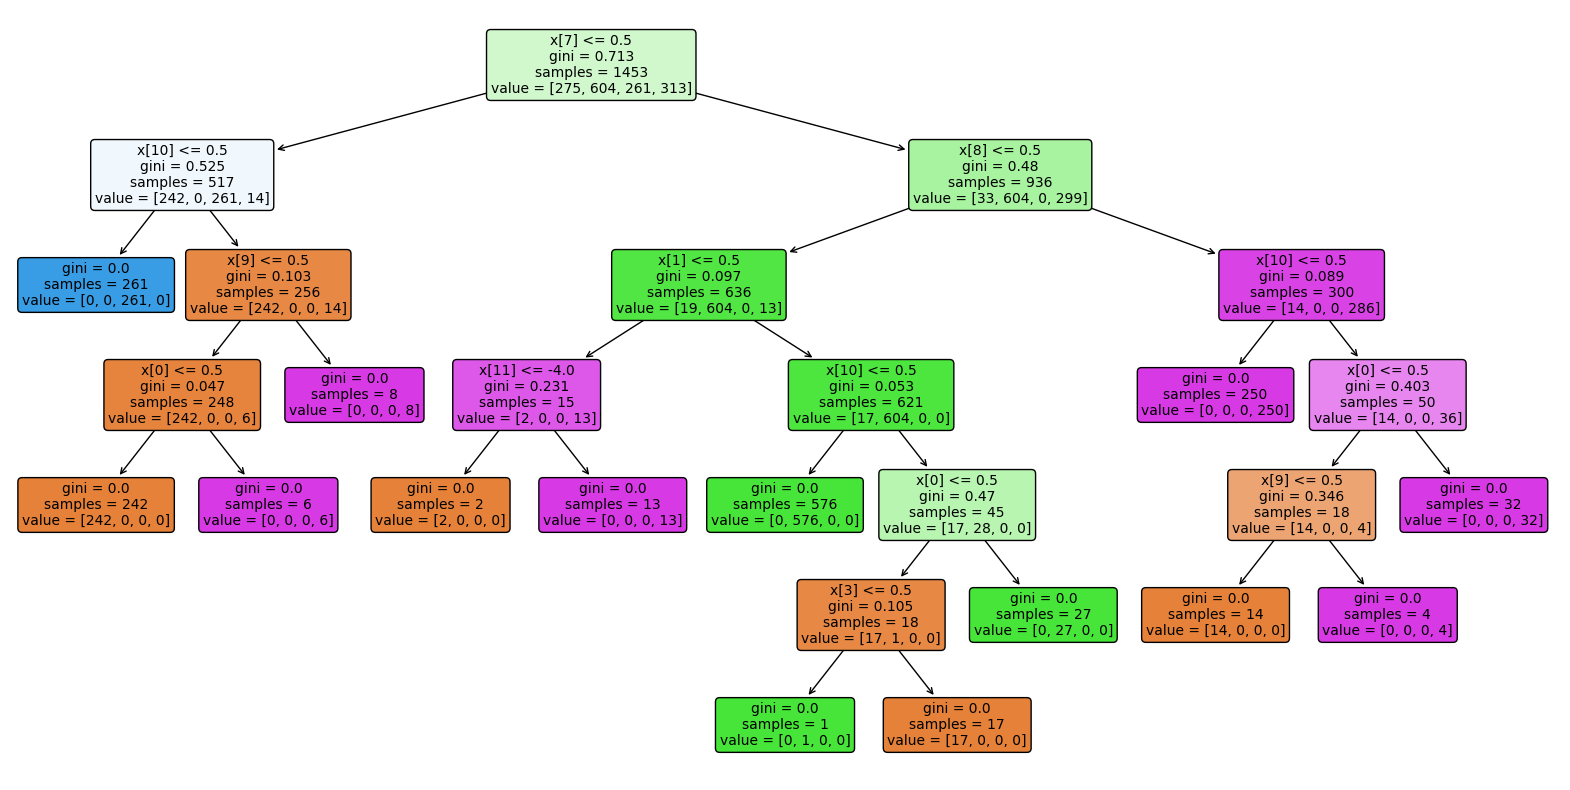

In [141]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, rounded=True, fontsize=10)
plt.show()


* Challenges in Evaluating the Model with Supervised Machine Learning Technique over Unsupervised Output:

1. K-means assumes that clusters are spherical and of equal size, working to minimize the sum of squared distances within clusters. However, these assumptions may not hold true for all types of data, potentially leading to K-means producing clusters that lack meaningful patterns.
2. The effectiveness of K-means depends on the interpretability and relevance of the generated clusters to the underlying problem. If the clusters lack meaningful interpretations or do not align with the problem at hand, the output may not serve as a solid foundation for further analysis.
3. In the application of the decision tree algorithm, it is crucial to ensure that the features used are not only relevant but also capable of capturing meaningful distinctions between clusters. The performance of the decision tree hinges on the quality and pertinence of the features incorporated.

**--------------Thank you for your crucial time --------------**